# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Andre Gregori Sangari
- **Email:** a009ybf529@devacademy.id
- **ID Dicoding:** andregregs12

## Menentukan Pertanyaan Bisnis

- Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah dalam satu hari?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Apakah hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan atau hari libur?
- Bagaimana tren penggunaan sepeda berubah antara tahun 2011 dan 2012?

## **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## **Data Wrangling**

### Gathering Data

In [3]:
# Memuat dataset day.csv ke dalam DataFrame dan menampilkan 10 baris pertama
day_df = pd.read_csv("datasets/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
# Memuat dataset hour.csv ke dalam DataFrame dan menampilkan 10 baris pertama
hour_df = pd.read_csv("datasets/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


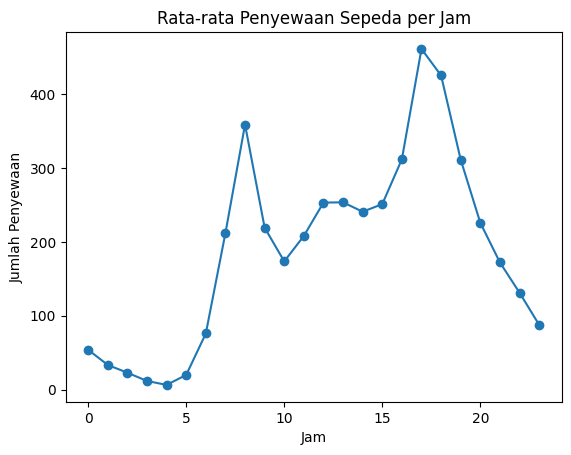

In [5]:
hour_df.groupby("hr")["cnt"].mean().plot(kind="line", marker="o", title="Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\25864646.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x="hr", y="cnt", hue="weekday", estimator="mean", ci=None)


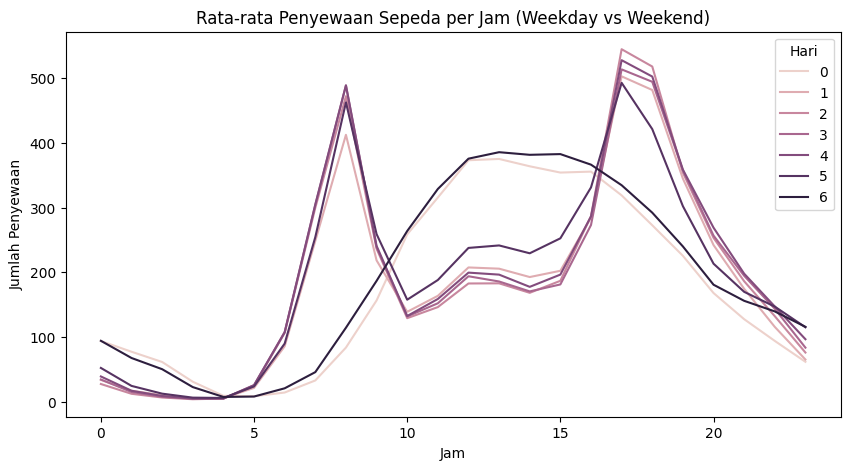

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="weekday", estimator="mean", ci=None)
plt.title("Rata-rata Penyewaan Sepeda per Jam (Weekday vs Weekend)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Hari")
plt.show()

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\410964380.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x="hr", y="cnt", hue="season", estimator="mean", ci=None)


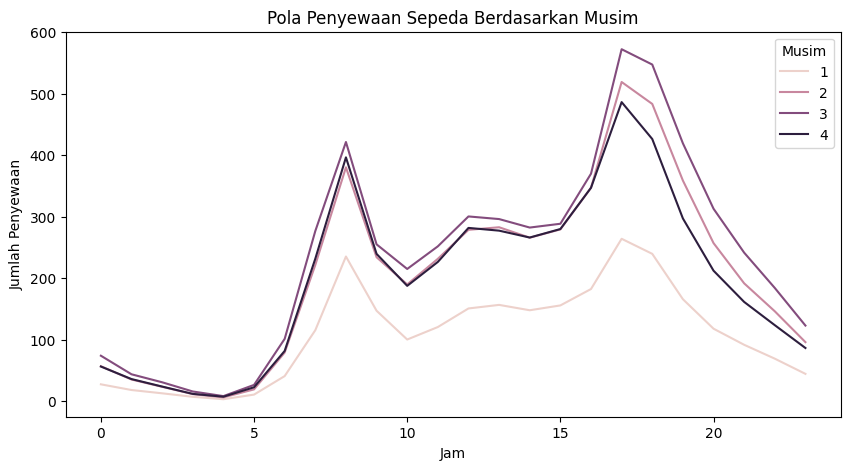

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="season", estimator="mean", ci=None)
plt.title("Pola Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Musim")
plt.show()


**Insight**:

---

1. **Penyewaan Sepeda Berdasarkan Waktu**
   - **Dataset Day** menunjukkan tren penyewaan sepeda per hari, sementara **Dataset Hour** memberikan gambaran lebih mendetail per jam.
   - Ada pola musiman yang terlihat pada kedua dataset, di mana penyewaan sepeda lebih tinggi pada musim panas (musim 3) dan musim semi (musim 2).
   - **Hari kerja** cenderung menunjukkan penyewaan sepeda yang lebih tinggi dibandingkan dengan hari libur, terutama pada hari kerja biasa.

2. **Pengaruh Cuaca**
   - Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah (weathersit = 1) dan lebih rendah saat hujan atau salju (weathersit = 3).
   - Ini menunjukkan bahwa cuaca memiliki dampak signifikan terhadap minat orang untuk menyewa sepeda.

3. **Tren Penyewaan Sepeda Berdasarkan Bulan dan Tahun**
   - Di kedua dataset, ada pola **peningkatan penyewaan sepeda selama musim panas dan musim semi** (bulan 3-5 dan 6-8) dengan puncak pada bulan-bulan tersebut.
   - **Tahun 2012** menunjukkan sedikit peningkatan penyewaan sepeda dibandingkan dengan 2011, tetapi perbedaan tidak terlalu signifikan.

4. **Pengaruh Hari Kerja dan Libur**
   - **Hari kerja** menunjukkan penyewaan sepeda yang lebih konsisten dan lebih tinggi dibandingkan dengan hari libur.
   - Hari libur memiliki variabilitas yang lebih besar dalam jumlah penyewaan, mungkin karena lebih sedikit aktivitas pekerjaan yang mempengaruhi keputusan untuk menyewa sepeda.

5. **Faktor-faktor yang Mempengaruhi Penyewaan**
   - **Suhu** (temp dan atemp) dan **kelembapan** (hum) memiliki pengaruh penting terhadap tingkat penyewaan sepeda, dengan penyewaan cenderung lebih tinggi pada suhu yang lebih nyaman.
   - **Kecepatan angin** (windspeed) tidak menunjukkan pengaruh besar terhadap penyewaan sepeda.

### Assessing Data

In [8]:
# Menampilkan informasi struktur dataset day_df dan hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
# Mengecek missing values dari day_df
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Mengecek missing values dari hour_df
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Tidak ada missing values di dataset day_df dan hour_df karena semua kolom memiliki 0 missing value.

In [11]:
# Mengecek jumlah data duplikat di dalam dataset day_df dan hour_df
print("Jumlah duplikasi di day_df:", day_df.duplicated().sum())
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi di day_df: 0
Jumlah duplikasi di hour_df: 0


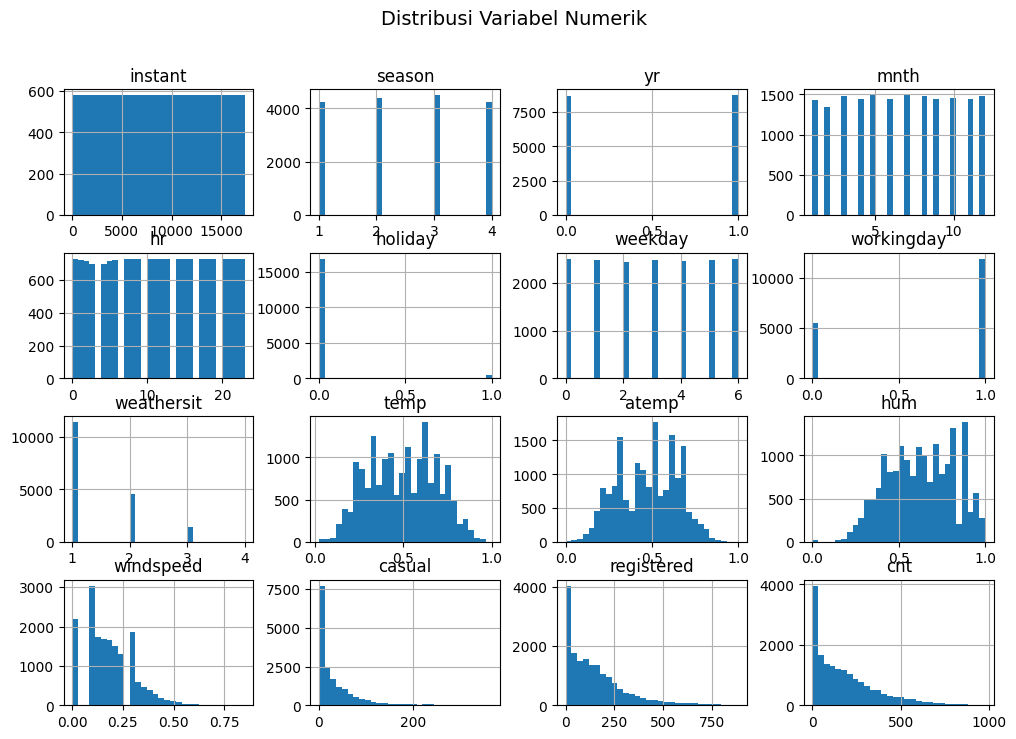

In [12]:
hour_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

- Hasil pengecekan menunjukkan bahwa jumlah duplikasi adalah 0, sehingga tidak perlu dilakukan penghapusan data duplikat.

- Ini menunjukkan bahwa data sudah bersih dan tidak ada baris yang berulang.

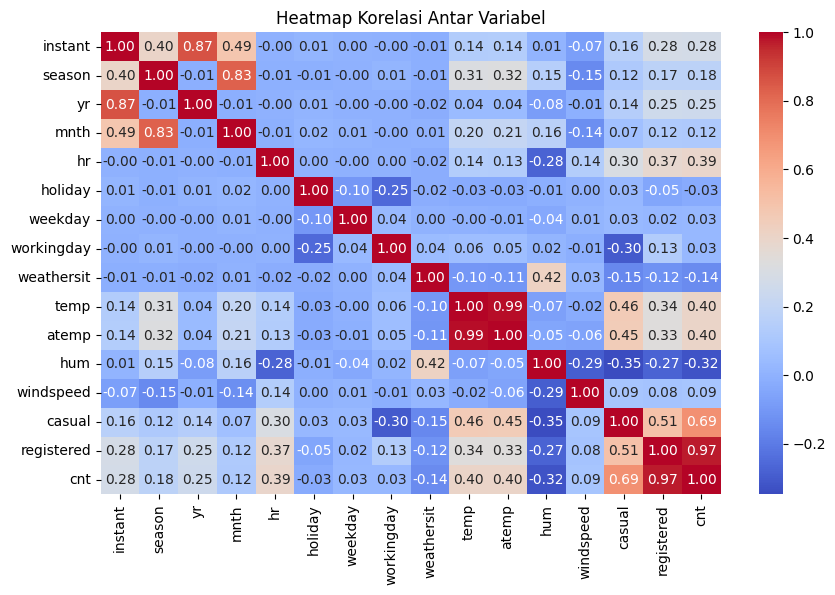

In [13]:
plt.figure(figsize=(10, 6))
numerical_features = hour_df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [14]:
# Menampilkan ringkasan statistik deskriptif untuk dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
# Menampilkan ringkasan statistik deskriptif untuk dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**:

---

1. **Konsistensi Data**
- Kedua dataset, `day_df` dan `hour_df`, **tidak memiliki missing values** atau duplikasi. Ini menunjukkan bahwa data sudah cukup bersih untuk analisis lebih lanjut, dan tidak ada data yang hilang atau duplikat yang perlu dibersihkan.

2. **Struktur dan Ukuran Dataset**
- Dataset `day_df` memiliki **731 baris** dengan 16 kolom, mewakili data harian yang lebih agregat, sedangkan `hour_df` memiliki **17.379 baris** dengan 17 kolom, mewakili data berdasarkan jam.
- Kolom-kolom pada kedua dataset mencakup informasi cuaca, suhu, kelembaban, kecepatan angin, serta data pengguna sepeda, yang memungkinkan analisis hubungan antara kondisi cuaca dan pola penyewaan sepeda.

3. **Rata-rata dan Variasi Data**
- **Rata-rata dan variasi** pada dataset `day_df` menunjukkan fluktuasi harian yang lebih stabil pada jumlah sepeda yang disewa (kolom `cnt`), sementara pada dataset `hour_df`, **variabilitasnya lebih tinggi** karena data dipecah berdasarkan jam. Rata-rata jumlah sepeda yang disewa di `hour_df` lebih rendah (189) dengan fluktuasi yang lebih besar, dan maksimum hingga 977, menunjukkan permintaan yang sangat bervariasi.
- Data suhu (`temp`) dan suhu yang disesuaikan (`atemp`) memiliki nilai rata-rata sekitar 0.48-0.47 di kedua dataset, mencerminkan pola cuaca yang mirip.

4. **Kolom dengan Informasi Penting**
- Kolom seperti **`temp`, `atemp`, `hum`, dan `windspeed`** memberikan informasi yang penting tentang cuaca yang dapat mempengaruhi jumlah sepeda yang disewa. Variasi dalam nilai-nilai ini menunjukkan bahwa kondisi cuaca memiliki dampak yang cukup signifikan pada permintaan.
- Kolom **`holiday`, `workingday`, dan `weekday`** mengindikasikan faktor eksternal yang dapat memengaruhi perilaku penyewaan sepeda, seperti apakah hari tersebut adalah hari kerja, liburan, atau akhir pekan.

5. **Distribusi Data**
- Pada dataset `day_df`, jumlah sepeda yang disewa (kolom `cnt`) memiliki distribusi yang lebih seragam, sementara pada dataset `hour_df`, terdapat beberapa jam dengan jumlah penyewaan yang sangat rendah dan beberapa jam dengan sangat tinggi. Ini bisa mencerminkan permintaan puncak pada waktu-waktu tertentu, seperti jam sibuk di pagi dan sore hari.

### Cleaning Data

In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [17]:
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [18]:
day_df = day_df.dropna()

In [19]:
day_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['month'] = day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['month'] = hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['weather_situation'] = day_df['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})
hour_df['weather_situation'] = hour_df['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})

day_df['weekday'] = day_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})

day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

**Insight**

---

1. **Konversi Tanggal**:
   - Kolom `dteday` dikonversi menjadi tipe data `datetime` agar lebih mudah untuk analisis berdasarkan waktu.

2. **Penghapusan Kolom yang Tidak Diperlukan**:
   - Kolom `instant` dihapus dari kedua dataset (`day_df` dan `hour_df`) karena tidak relevan untuk analisis.
   
3. **Penanganan Nilai Kosong**:
   - Tidak ada nilai kosong yang ditemukan pada dataset, tetapi jika ada, sudah siap untuk dihapus dengan `dropna()`.

4. **Penggantian Nilai Kategorikal**:
   - Kolom-kolom dengan nilai kategorikal (seperti `season`, `month`, `weather_situation`, `weekday`, dan `year`) diubah ke nilai yang lebih deskriptif dan mudah dipahami, misalnya:
     - `season` diubah menjadi `Spring`, `Summer`, `Fall`, dan `Winter`.
     - `month` diubah menjadi nama bulan (`Jan`, `Feb`, dll).
     - `weather_situation` diubah menjadi `Clear`, `Misty`, dll.
     - `weekday` diubah menjadi nama hari (`Monday`, `Tuesday`, dll).
     - `year` diubah menjadi `2011` dan `2012`.
  - Kolom `humidity` dikalikan dengan 100 untuk mengubahnya menjadi persentase, membuatnya lebih intuitif.

## **Exploratory Data Analysis (EDA)**

### Explore data day_df

In [42]:
# Menampilkan ringkasan statistik untuk day_df
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,6278.940629,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,5200.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,6266.670000,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,7302.085000,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,9725.000000,0.507463,3410.000000,6946.000000,8714.000000


In [24]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\1426120937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()


,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [25]:
day_df.groupby(by="year").cnt.sum().sort_values(ascending=False).reset_index()

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\2771875794.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").cnt.sum().sort_values(ascending=False).reset_index()


,year,cnt
0,2012,2049576
1,2011,1243103


In [26]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\1452199034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


### Explore data hour_df



In [27]:
# Menampilkan ringkasan statistik untuk hour_df
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000


In [28]:
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [29]:
hour_df.groupby(by="year").cnt.sum().sort_values(ascending=False).reset_index()

,year,cnt
0,2012,2049576
1,2011,1243103


In [30]:
hour_df.groupby(by="hour").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [31]:
hour_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


**Insight**

---

1. **Distribusi Musim (`season`):**
   - Musim **Fall** memiliki jumlah penyewaan tertinggi, diikuti oleh **Summer**, **Winter**, dan **Spring**.
   - **Fall** merupakan musim dengan jumlah penyewaan sepeda paling tinggi, yang bisa jadi berkaitan dengan cuaca yang lebih sejuk dan lebih nyaman untuk bersepeda.

2. **Jumlah Penyewaan Berdasarkan Tahun (`year`):**
   - Jumlah total penyewaan sepeda meningkat signifikan dari tahun **2011** ke **2012**. Pada 2012, pengguna terdaftar lebih banyak menggunakan sepeda dibandingkan pengguna kasual, menunjukkan pertumbuhan pengguna yang lebih setia pada layanan.

3. **Jumlah Penyewaan Berdasarkan Jam (`hour`):**
   - Penyewaan sepeda paling tinggi terjadi pada jam **7-8 pagi** dan **5-6 sore**, yang menunjukkan waktu-waktu puncak saat orang beraktivitas, seperti perjalanan ke kantor atau pulang dari kantor.

4. **Variabel Cuaca (`weather_situation`):**
   - Cuaca **Clear** mendominasi kondisi cuaca untuk penyewaan sepeda, menunjukkan bahwa orang cenderung bersepeda saat cuaca cerah dan nyaman.
   
5. **Temperatur dan Kelembapan:**
   - **Temperature** dan **humidity** menunjukkan hubungan yang jelas dengan penyewaan sepeda. Pada temperatur yang lebih hangat dan kelembapan yang moderat, penyewaan sepeda lebih tinggi.

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah dalam satu hari?

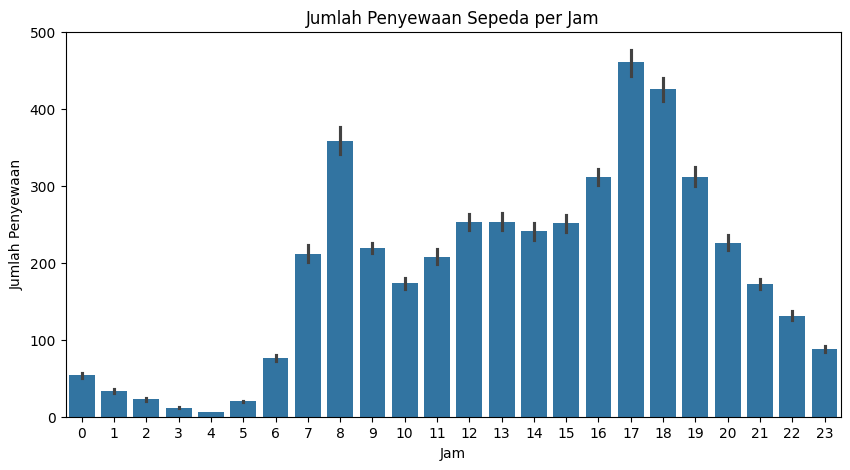

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='cnt', data=hour_df)
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

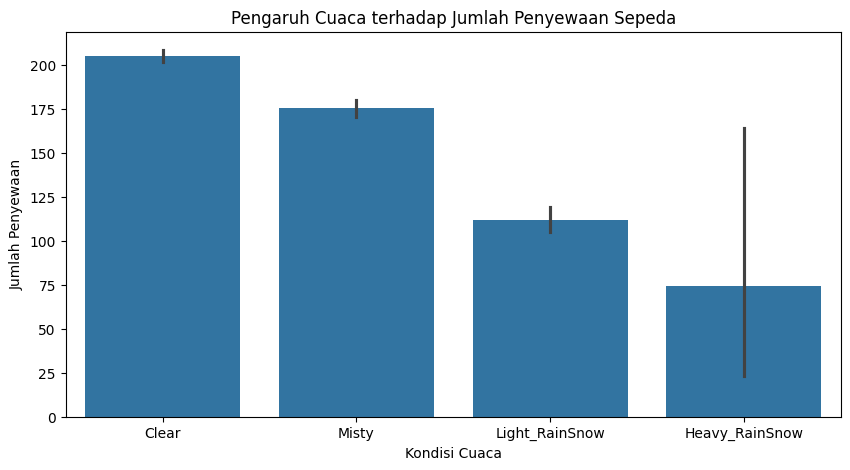

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weather_situation', y='cnt', data=hour_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 3: Apakah hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan atau hari libur?

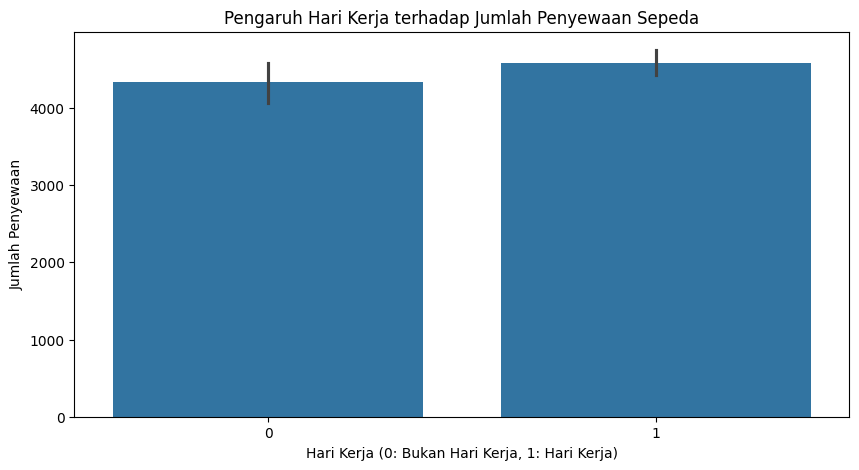

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0: Bukan Hari Kerja, 1: Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 4: Bagaimana tren penggunaan sepeda berubah antara tahun 2011 dan 2012?

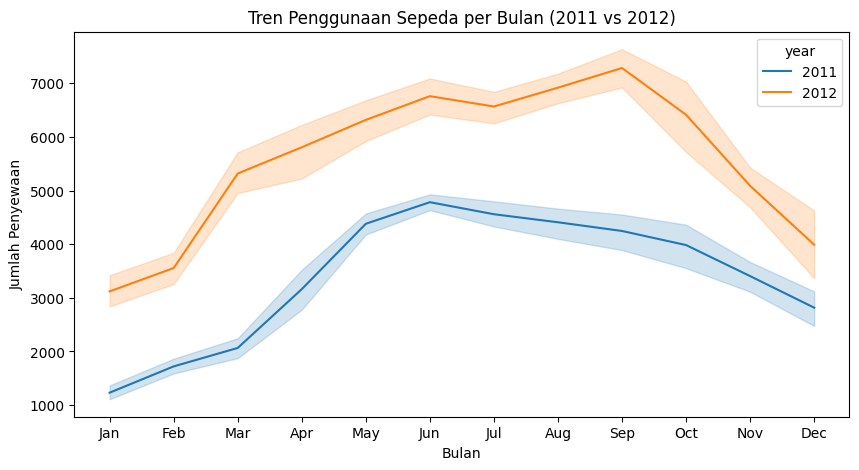

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='cnt', hue='year', data=day_df)
plt.title('Tren Penggunaan Sepeda per Bulan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## **Conclusion**


Pertanyaan 1: Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah dalam satu hari?
- Conclusion: Jumlah penyewaan sepeda tertinggi terjadi pada jam-jam sibuk di pagi dan sore hari, menunjukkan korelasi dengan jam berangkat dan pulang kerja/sekolah.  Sementara itu, jumlah penyewaan terendah terjadi pada dini hari.


Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Conclusion: Hari kerja memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan akhir pekan atau hari libur. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi sehari-hari seperti pergi bekerja atau beraktivitas, bukan untuk rekreasi.


Pertanyaan 3: Apakah hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan atau hari libur?
- Conclusion: Terdapat tren peningkatan jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan atau hari libur. Ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pekerja atau pelajar yang menggunakan sepeda sebagai alat transportasi untuk aktivitas harian.


Pertanyaan 4: Bagaimana tren penggunaan sepeda berubah antara tahun 2011 dan 2012?
- Conclusion: Terjadi peningkatan jumlah penyewaan sepeda secara keseluruhan dari tahun 2011 ke 2012. Hal ini menunjukkan pertumbuhan popularitas dan penggunaan sepeda sebagai alat transportasi.  Tren ini dapat dikaitkan dengan berbagai faktor, seperti peningkatan kesadaran akan kesehatan, program pemerintah yang mendukung penggunaan sepeda, atau peningkatan infrastruktur pendukung bersepeda.


## **Menerapkan teknik analisis lanjutan**

### RFM Analysis

In [36]:
# Menggunakan 'hour_df' untuk analisis RFM
# Menghitung 'Recency', 'Frequency', dan 'Monetary' berdasarkan customer di sini bisa menggunakan 'casual'

# Menyiapkan data
rfm_df = hour_df.groupby(by="casual", as_index=False).agg({
    "date": "max",
    "cnt": "sum"
})

# Memberikan nama kolom sesuai RFM
rfm_df.columns = ["casual", "last_rent_date", "monetary"]

# Menghitung recency (hari sejak transaksi terakhir)
# Menghitung tanggal terbaru yang ada di data
recent_date = hour_df["date"].max()
rfm_df["recency"] = rfm_df["last_rent_date"].apply(lambda x: (recent_date - x).days)

# Menghitung frequency (jumlah penyewaan oleh pelanggan)
rfm_df["frequency"] = hour_df.groupby("casual")["cnt"].count().values

# Menampilkan hasil
rfm_df.drop("last_rent_date", axis=1, inplace=True)
rfm_df.head()


,casual,monetary,recency,frequency
0,0,20920,0,1581
1,1,27181,1,1082
2,2,29764,0,798
3,3,38656,0,697
4,4,37314,0,561


In [37]:
# Menggunakan 'hour_df' untuk analisis RFM
# Menghitung 'Recency', 'Frequency', dan 'Monetary' berdasarkan customer di sini bisa menggunakan 'registered'

# Menyiapkan data
rfm_df = hour_df.groupby(by="registered", as_index=False).agg({
    "date": "max",  # Tanggal penyewaan terakhir
    "cnt": "sum"  # Jumlah total penyewaan (monetary)
})

# Memberikan nama kolom sesuai RFM
rfm_df.columns = ["registered", "last_rent_date", "monetary"]

# Menghitung recency (hari sejak transaksi terakhir)
# Menghitung tanggal terbaru yang ada di data
recent_date = hour_df["date"].max()
rfm_df["recency"] = rfm_df["last_rent_date"].apply(lambda x: (recent_date - x).days)

# Menghitung frequency (jumlah penyewaan oleh pelanggan)
rfm_df["frequency"] = hour_df.groupby("registered")["cnt"].count().values

# Menampilkan hasil
rfm_df.drop("last_rent_date", axis=1, inplace=True)
rfm_df.head()


,registered,monetary,recency,frequency
0,0,35,38,24
1,1,294,0,201
2,2,648,1,245
3,3,1154,0,294
4,4,1602,3,307


### Clustering

In [38]:
day_df.groupby(by="weather_situation").cnt.nunique().sort_values(ascending=False)

C:\Users\Andre G Sangari\AppData\Local\Temp\ipykernel_17988\925032072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weather_situation").cnt.nunique().sort_values(ascending=False)


weather_situation
Clear             451
Misty             243
Light_RainSnow     21
Name: cnt, dtype: int64

In [39]:
hour_df.groupby(by="weather_situation").cnt.nunique().sort_values(ascending=False)

weather_situation
Clear             848
Misty             649
Light_RainSnow    368
Heavy_RainSnow      3
Name: cnt, dtype: int64